# Libraries

In [1]:
import numpy as np
import pandas as pd
import pyproj
from pyproj import Transformer
from datetime import date,datetime
import yaml

In [37]:
#All bokeh imports

import bokeh

from bokeh.io import show, output_notebook

from bokeh.layouts import column, row

#Used to structure the data input
from bokeh.models import ColumnDataSource

#User inputs
from bokeh.models import Slider, Button, TextInput, DateRangeSlider, DatePicker

#
from bokeh.models import CategoricalColorMapper

from bokeh.models import ColorBar, NumeralTickFormatter, Circle

from bokeh.models import LassoSelectTool, BoxSelectTool

from bokeh.palettes import Spectral6, PRGn, Turbo256
palette = Turbo256

from bokeh.plotting import figure, output_file, show

from bokeh.themes import Theme

from bokeh.tile_providers import CARTODBPOSITRON, OSM, get_provider

from bokeh.transform import linear_cmap, log_cmap

output_notebook()

Loading BokehJS ...

# Functions

In [3]:
def web_mercator_transform(df_latitude_longitude):
    
    #Transformer to get the coordinates into web mercator format which is what the geo graph takes to plot
    transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857")
    
    transformed_values = transformer.transform(df_latitude_longitude['latitude'].values,
                                               df_latitude_longitude['longitude'].values)
    
    #Transpose the transformed values and then parse then into a dataframe
    #np.array() allows the values to be transformed (.T)
    lat_long_web_mercator = pd.DataFrame(np.array(transformed_values).T)
    
    #Set the columns to the correct format
    lat_long_web_mercator.columns = ['latitude','longitude']
    
    return(lat_long_web_mercator)

# Data Preparation

In [5]:
#Loading twitter data into the python environment

twitter_data = pd.read_csv("D:/Master Project/complete_swiss_dataset.csv",encoding = "ISO-8859-15")

C:\Users\kstei\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (19,22,25,38,39,44,54,57,63,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,101) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
twitter_data.sort_values(by='latitude')

,Unnamed: 0,user_screen_name,PK,id,latitude,longitude,raw_geo,place_type,place_full_name,place_country_code,...,created_at_CET,created_at_GMT,created_at_EST,check_in_bot,weather_station_bot,Stress.overall.score,homeplace,workplace,cap_english,cap_universal
751151,751152,NeenaAbdul,917499550419636224_455593068_25.34657637_49.58...,917499550419636224,25.34658,49.584410,"{u'type': u'Point', u'coordinates': [49.584412...",country,Switzerland,CH,...,2017-10-09 23:18:33,2017-10-09 21:18:33,2017-10-09 16:18:33,False,False,0,0,0,0.001725,0.001866
320602,320603,FAISAL881,774108643327217664_340820672_26.6406441_49.916...,774108643327217664,26.64064,49.916100,"{u'type': u'Point', u'coordinates': [49.916102...",city,"Thun, Switzerland",CH,...,2016-09-09 06:54:17,2016-09-09 04:54:17,2016-09-08 23:54:17,False,False,0,0,0,0.001946,0.002308
2606,2607,_abm98,552529067665526784_1096293950_27.00729723_49.6...,552529067665526784,27.00730,49.654690,"{u'type': u'Point', u'coordinates': [49.654687...",country,Switzerland,CH,...,2015-01-06 19:16:09,2015-01-06 18:16:09,2015-01-06 13:16:09,False,False,0,0,0,0.141574,0.016452
835046,835047,r_alsube,712558295375036416_636628914_27.1146475_49.550...,712558295375036416,27.11465,49.550750,"{u'type': u'Point', u'coordinates': [49.550754...",city,"Geneva, Switzerland",CH,...,2016-03-23 09:35:10,2016-03-23 08:35:10,2016-03-23 03:35:10,False,False,0,0,0,0.012788,0.005778
58256,58257,aliasgarmg,877506317056974848_204763918_29.3306846_48.064...,877506317056974848,29.33068,48.064100,"{u'type': u'Point', u'coordinates': [48.064104...",city,"Zug, Switzerland",CH,...,2017-06-21 14:39:43,2017-06-21 12:39:43,2017-06-21 07:39:43,False,False,0,0,0,0.001635,0.001936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400855,400856,hantighton,568719996261679104_413095832_55.73092159_37.45...,568719996261679104,55.73092,37.453090,"{u'type': u'Point', u'coordinates': [37.453094...",city,"Bagnes, Switzerland",CH,...,2015-02-20 11:33:08,2015-02-20 10:33:08,2015-02-20 05:33:08,False,False,0,0,0,0.001262,0.001744
131836,131837,BhoyWonder_,743469602076753920_529258437_55.94907563_-3.36...,743469602076753920,55.94908,-3.362888,"{u'type': u'Point', u'coordinates': [-3.362888...",city,"Les Genevez (JU), Suisse",CH,...,2016-06-16 17:45:40,2016-06-16 15:45:40,2016-06-16 10:45:40,False,False,0,0,0,0.001554,0.002910
70051,70052,anciitje,683033906686332928_1112214211_56.95384814_24.1...,683033906686332928,56.95385,24.137370,"{u'type': u'Point', u'coordinates': [24.137374...",country,Switzerland,CH,...,2016-01-01 22:15:48,2016-01-01 21:15:48,2016-01-01 16:15:48,False,False,0,0,0,0.141574,0.067479
911081,911082,shura_sh,591326732700921856_411094616_59.9398166_30.284...,591326732700921856,59.93982,30.284800,"{u'type': u'Point', u'coordinates': [30.284800...",city,"Romoos, Schweiz",CH,...,2015-04-23 21:44:14,2015-04-23 19:44:14,2015-04-23 14:44:14,False,False,0,0,0,0.032183,0.003354


In [7]:
coord_data = twitter_data[['latitude','longitude']]
coord_data = coord_data.round(3)

In [16]:
#Lines to format a dataframe in the correct format for the geographical representation (geo_map)

#Copying the relevant columns from twitter_data into geo_map_data
geo_map_data = twitter_data[['latitude','longitude','created_at_CET']].copy(deep=True)

#Rounding all values in geo_map_data 
#Only important for longitude and latitude, due to 1. privacy and 2. computing densities
geo_map_data = geo_map_data.round(3)

#Add a new colunn to keep track of the original ID of the row (tweet)
geo_map_data.loc[:,'ID'] = geo_map_data.index

#Set the date of creation as the index which allows for querying the data using dates
geo_map_data = geo_map_data.set_index(['created_at_CET'])

geo_map_data.index = pd.to_datetime(geo_map_data.index, format='%Y-%m-%d %H:%M:%S')

lat_long_correct_format = web_mercator_transform(geo_map_data[['latitude','longitude']])

geo_map_data.loc[:,'latitude'] = np.array(lat_long_correct_format['latitude'])

geo_map_data.loc[:,'longitude'] = np.array(lat_long_correct_format['longitude'])

In [17]:
geo_map_data.drop_duplicates(subset=['latitude','longitude'])[0:10]

,latitude,longitude,ID
created_at_CET,,,
2017-12-05 22:47:22,8.452489e+05,6.034294e+06,0
2017-10-07 08:52:47,9.554552e+05,6.016002e+06,1
2017-03-29 00:36:11,6.852828e+05,5.812779e+06,2
2015-06-27 12:47:23,8.446923e+05,6.033634e+06,3
2015-01-05 14:06:44,1.058982e+06,5.918113e+06,4
2015-04-13 10:46:21,1.061097e+06,5.917299e+06,5
2016-12-10 18:11:51,7.692177e+05,5.850011e+06,6
2016-04-03 07:31:38,8.818730e+05,5.997748e+06,7
2015-01-04 16:32:30,6.936317e+05,5.819698e+06,8


In [21]:
geo_map_data = geo_map_data.sort_values(by='created_at_CET')

In [24]:
geo_map_data['2015-01-01':'2017-01-01']

,latitude,longitude,ID
created_at_CET,,,
2015-01-01 01:00:03,9.515590e+05,6.017154e+06,577072
2015-01-01 01:00:09,9.770512e+05,5.806027e+06,372682
2015-01-01 01:00:14,7.713328e+05,5.838228e+06,921301
2015-01-01 01:00:22,6.948563e+05,5.841778e+06,151568
2015-01-01 01:00:34,9.770512e+05,5.806027e+06,372724
...,...,...,...
2017-01-01 00:54:28,8.456942e+05,6.034129e+06,218526
2017-01-01 00:54:52,1.092489e+06,5.862134e+06,260687
2017-01-01 00:55:44,9.512250e+05,6.001692e+06,621562


In [25]:
temp = geo_map_data[['latitude','longitude']]

In [26]:
geo_map_data[['latitude','longitude']]

,latitude,longitude
created_at_CET,,
2015-01-01 01:00:03,951559.007301,6.017154e+06
2015-01-01 01:00:09,977051.170693,5.806027e+06
2015-01-01 01:00:14,771332.751707,5.838228e+06
2015-01-01 01:00:22,694856.261532,5.841778e+06
2015-01-01 01:00:34,977051.170693,5.806027e+06
...,...,...
2018-09-06 16:51:13,916382.048210,5.909327e+06
2018-09-06 16:53:31,684169.590415,5.812457e+06
2018-09-06 16:53:53,679382.852311,5.817445e+06


In [86]:
web_mercator_transform(geo_map_data[['latitude','longitude']])

,latitude,longitude
0,8.452489e+05,6.034294e+06
1,9.554552e+05,6.016002e+06
2,6.852828e+05,5.812779e+06
3,8.446923e+05,6.033634e+06
4,1.058982e+06,5.918113e+06
...,...,...
1115888,9.517816e+05,6.002185e+06
1115889,1.061654e+06,5.921206e+06
1115890,6.826111e+05,5.817445e+06
1115891,8.800919e+05,5.875407e+06


In [42]:
def dev_bkapp(doc):

    #Add tile_provider, which shows the world in web mercator format
    tile_provider = get_provider(CARTODBPOSITRON)

    # range bounds supplied in web mercator coordinates
    geo_map = figure(x_range=(650000, 1200000), y_range=(5700000, 6100000),
               x_axis_type="mercator", y_axis_type="mercator")
    #Add the background of the graph
    geo_map.add_tile(tile_provider)
    
    #Add two selector tools to the geo graph
    geo_map.add_tools(LassoSelectTool())
    geo_map.add_tools(BoxSelectTool())

    #Transformer to get the coordinates into the correct format
    #TODO: format the data before its parsed
    transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857")
    
    #Copy part of the dataframe to show those data points on the geo graph
    dev_coord_density = geo_map_data.loc['2015-1-1':'2015-2-1'].copy()
        
    #Sort the data points by latitude and longitude
    dev_coord_density = dev_coord_density.sort_values(by=['latitude','longitude'])

    #Rewrite the index with 0 .. length of dataframe, as time has already been specified
    #And this allows for the next step: computing density
    dev_coord_density = dev_coord_density.set_index(np.arange(0,len(dev_coord_density),1))

    #Remove the duplicates from the datagframe, checking only the latitude and longitude
    dev_coord_density_no_dup = dev_coord_density.drop_duplicates(subset=['latitude','longitude'])

    #Create a new array of ones, to compute the densities
    density = np.ones(len(dev_coord_density_no_dup))

    #Loop the dataframe and set the densities to the difference in index
    #Removing duplicates keeps the first index of the duplicates,
    #so the gaps in indicices are equal to the amount of duplicates present
    for i in range(0,len(dev_coord_density_no_dup)-1):
        density[i] = dev_coord_density_no_dup.index[i+1] - dev_coord_density_no_dup.index[i]

    #Add density as a column of the dataframe
    dev_coord_density_no_dup.loc[:,'density'] = density

    #Transform all the coordinates to web mercator format
    dev_merc_coord = transformer.transform(dev_coord_density_no_dup['latitude'].values,
                                           dev_coord_density_no_dup['longitude'].values)
    
    #Reformat the web mercator coordinates to fit the correct format
    plot_data = pd.DataFrame(np.array(dev_merc_coord).T)
    plot_data.columns = ['longitude','latitude']

    #Add the density column to the dataframe
    plot_data.loc[:,'density'] = density

    #Set the source of the graph to the ColumnDataSource of the dataframe
    source = ColumnDataSource(plot_data)

    #Create a mapping of color based on the max and min densities in the dataframe
    color_mapper = log_cmap(field_name = 'density', palette = palette,
                               low = plot_data.loc[:,'density'].min(), high = plot_data.loc[:,'density'].max())

    #Defines color bar, which shows the scale of the color_mapper
    color_bar = ColorBar(color_mapper=color_mapper['transform'], 
                         formatter = NumeralTickFormatter(format='0.0[0000]'), 
                         label_standoff = 13, width=8, location=(0,0))# Set color_bar location

    #Add the color bar to the graph on the right side
    geo_map.add_layout(color_bar, 'right')
    
    #Add the data points as circles to the geo graph
    geo_map.circle(x='longitude', y='latitude', size=2, alpha=0.7, source=source, color=color_mapper)
    
    #Define a handler which is called when the coupled button is pressed, coupling occurs later
    def my_button_handler(new):
        
        start_date = start_date_input.value
        
        end_date = end_date_input.value
        
        dev_coord_density = geo_map_data.loc[start_date:end_date].copy()
        
        dev_coord_density = dev_coord_density.sort_values(by=['latitude','longitude'])
        
        dev_coord_density = dev_coord_density.set_index(np.arange(0,len(dev_coord_density),1))
        
        dev_coord_density_no_dup = dev_coord_density.drop_duplicates(subset=['latitude','longitude'])
        
        density = np.ones(len(dev_coord_density_no_dup))
        
        for i in range(0,len(dev_coord_density_no_dup)-1):
            density[i] = dev_coord_density_no_dup.index[i+1] - dev_coord_density_no_dup.index[i]
        
        dev_merc_coord = transformer.transform(dev_coord_density_no_dup['latitude'].values,
                                               dev_coord_density_no_dup['longitude'].values)
        
        plot_data = pd.DataFrame(np.array(dev_merc_coord).T)
        plot_data.columns = ['longitude','latitude']

        plot_data.loc[:,'density'] = density

        color_mapper = log_cmap(field_name = 'density', palette = palette,
                                   low = plot_data.loc[:,'density'].min(), high = plot_data.loc[:,'density'].max())
        
        color_bar.color_mapper=color_mapper['transform']
        
        source.data = plot_data

    #Create a button for the updating of geo graph
    button = Button(label="Update", button_type="success")

    #Couple the button to the handler defined above
    button.on_click(my_button_handler)
    
    #Create a button for the updating of the histogram
    dev_button = Button(label="Print", button_type="success")

    #Temporary handler for dev_button which should couple to the histogram
    def temp():
        selected = source.selected.indices
        
        hist.data['x'] = selected
        
        print(selected)
        
        print(plot_data[selected[0]])
    
    dev_button.on_click(temp)
    
    start_date_input = DatePicker(value="2015-01-01", title="Start Date:")
    
    end_date_input = DatePicker(value="2015-02-01", title="End Date:")

    histogram = figure()
    
    hist = ColumnDataSource(data=dict(x=[0,1,2,3,4,5]))
    
    histogram.circle(x='x', size=10, alpha=0.7, source=hist)
    
    #doc.add_root(row(column(geo_map,row(start_date_input,end_date_input),row(button)),column(histogram,dev_button)))
    doc.add_root(column(geo_map,row(start_date_input,end_date_input),row(button)))

In [43]:
show(dev_bkapp)

F:\Python\Anaconda\envs\MP\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
F:\Python\Anaconda\envs\MP\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


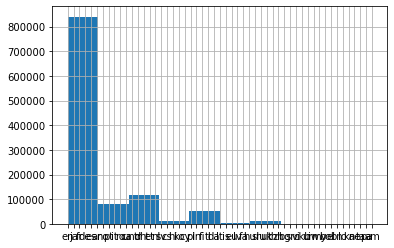

In [56]:
twitter_data['lang'].hist()